# Binary classification based on Logistic Regression with a quadratic regularization

## import library

In [1001]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load data

In [1002]:
fname_data_train    = 'assignment_10_data_train.csv'
fname_data_test     = 'assignment_10_data_test.csv'

data_train  = np.genfromtxt(fname_data_train, delimiter=',')
data_test   = np.genfromtxt(fname_data_test, delimiter=',')

num_data = data_train.shape[0]
#print(data_train.shape[1])
#print(data_train)
#print(data_train)
#print(data_test)

label_train = np.zeros(num_data)
label_test = np.zeros(num_data)

for i in range(num_data):
    label_train[i] = data_train[i,2]
    label_test[i] = data_test[i,2]
    
#print(label_train)
#print(label_test)

    


## plot the data

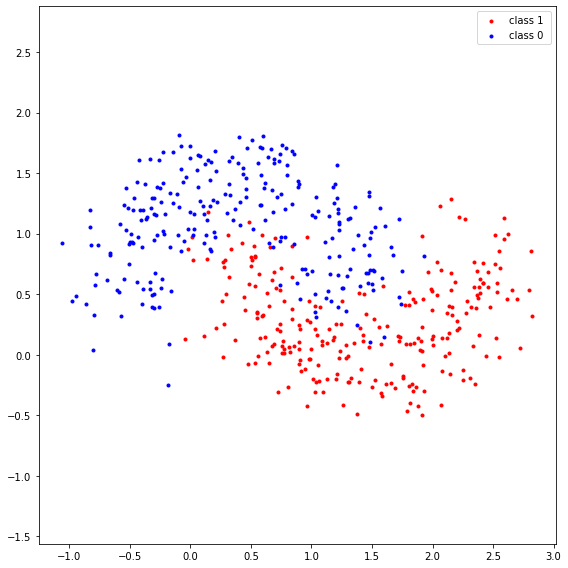

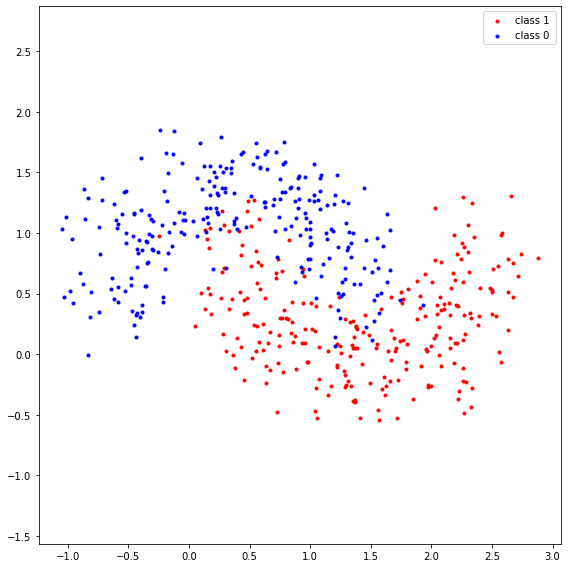

In [1003]:
plt.figure(figsize=(8,8))
plt.scatter(data_train[:, 0][label_train == 1],data_train[:, 1][label_train == 1], c="r", marker=".", label="class 1 ")
plt.scatter(data_train[:, 0][label_train == 0],data_train[:, 1][label_train == 0], c="b", marker=".", label="class 0 ")

plt.axis('equal')
plt.legend()
plt.tight_layout()

plt.figure(figsize=(8,8))
plt.scatter(data_test[:, 0][label_test == 1],data_test[:, 1][label_test == 1], c="r", marker=".", label="class 1 ")
plt.scatter(data_test[:, 0][label_test == 0],data_test[:, 1][label_test == 0], c="b", marker=".", label="class 0 ")

plt.axis('equal')
plt.legend()
plt.tight_layout()

plt.show()

## define feature function

In [1004]:
def feature_function(x, y):
    
    feature = np.array([np.ones(x.size),2*x,2*x**2,x**3,x**4,2*y,y**2,y**3,y**4,y**5])
    return feature

## define regression function based on the feature function

In [1005]:
def regression_function(theta, feature):
    
    value = np.dot(theta,feature)
    
    return value

## define regularization function on the model parameters

In [1006]:
def regularization_function(theta):
    
    d = len(theta)
    value = (1/d)*np.dot(theta,theta)
    
    return value

## define sigmoid function

In [1007]:
def logistic_function(theta,feature):
    
    f = regression_function(theta,feature)
    z = 1/(1+np.exp(-f))
    
    return z

## define loss function where $\alpha$ is a weight for the quadratic regularization term (Note that you need to add a small number (np.finfo(float).eps) inside logarithm function in order to avoid $\log( 0 )$)

In [1008]:
def compute_loss_feature(theta, feature, label, alpha):
    
    h = logistic_function(theta,feature)
    loss = 0
    e = np.finfo(float).eps
    loss = -((1/num_data)*(np.dot(label,np.log(h + e)) + np.dot((1-label),np.log(1-h + e))))
    loss = loss +  (alpha)*regularization_function(theta)
    
    return loss




## define gradient vector for the model parameters with the quadratic regularization term whose weight is $\alpha$

In [1009]:
def compute_gradient_feature(theta, feature, label, alpha):
    X = feature
    h = logistic_function(theta,feature)
    l = label
    d = theta.size
    gradient = (1/num_data)*np.dot(X,(h-l)) + (2*alpha/d) * theta
    
    return gradient

## compute the accuracy

In [1010]:
def compute_accuracy(theta, feature, label):
    
    h = np.array( logistic_function(theta,feature) )
    #print("h",h)
    computed_label = (h >= 0.5)
    #print("computed_label",computed_label)
    correct_matrix = (computed_label.astype(int) == label).astype(int)
    #print(correct_matrix)
    correct = np.sum(correct_matrix)
    #print("correct",correct)
    accuracy = correct/num_data
    
    return accuracy

## gradient descent for the model parameters $\theta$

In [1011]:
num_iteration   =  5550   
learning_rate   = 0.5
alpha           = 0.00000001
dim_feature = theta.size
#theta = np.array((0,0,0,0,0,0,0,0,0,0))
theta = np.zeros(dim_feature)
#print(dim_feature)
feature_train = feature_function(data_train[:, 0],data_train[:, 1])
feature_test = feature_function(data_test[:, 0],data_test[:, 1])
train_loss = 0
test_loss = 0

In [1012]:
theta_iteration             = np.zeros((num_iteration, dim_feature))
loss_iteration_train        = np.zeros(num_iteration)
loss_iteration_test         = np.zeros(num_iteration)
accuracy_iteration_train    = np.zeros(num_iteration)
accuracy_iteration_test     = np.zeros(num_iteration)

In [1013]:
for i in range(num_iteration):
    theta = theta - learning_rate * compute_gradient_feature(theta, feature_train, label_train, alpha)
    
    train_loss = compute_loss_feature(theta, feature_train, label_train, alpha)
    test_loss = compute_loss_feature(theta, feature_test, label_test, alpha)
    
    theta_iteration[i] = theta
    loss_iteration_train[i] = train_loss
    loss_iteration_test[i] = test_loss
    
    accuracy_iteration_train[i] = compute_accuracy(theta, feature_train, label_train)
    accuracy_iteration_test[i] = compute_accuracy(theta, feature_test, label_test)
    
    
    #print("[",i,"]loss(train) = ", loss_iteration_train[i],"loss(test) = ",loss_iteration_test[i],"ac_train",accuracy_iteration_train[i],"ac_test",accuracy_iteration_test[i])
    
theta_optimal = theta

In [1014]:
#theta_iteration

## compute accuracy of the classifiers

In [1015]:
accuracy_train  = compute_accuracy(theta_optimal, feature_train, label_train)
accuracy_test   = compute_accuracy(theta_optimal, feature_test, label_test)

## plot the results

In [1016]:
def plot_loss_curve(loss_iteration_train, loss_iteration_test):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    
    plt.title('loss')
    plt.plot(loss_iteration_train, color = 'red',label = 'train')
    plt.plot(loss_iteration_test, color = 'blue',label = 'test')

    plt.xlabel('iteration')
    plt.ylabel('loss')
    plt.legend(loc = 'upper right')
    
    

    plt.tight_layout()
    plt.show()

In [1017]:
def plot_accuracy_curve(accuracy_iteration_train, accuracy_iteration_test):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('accuracy')

    plt.plot(accuracy_iteration_train, color = 'red',label = 'train')
    plt.plot(accuracy_iteration_test, color = 'blue',label = 'test')


    plt.tight_layout()
    plt.show()

In [1018]:
def plot_data(data_train, data_test):
    
    f = plt.figure(figsize=(16,8))   
    
    plt.scatter(data_train[:, 0][label_train == 1],data_train[:, 1][label_train == 1], c="r", marker=".", label="class 1 ")
    plt.scatter(data_train[:, 0][label_train == 0],data_train[:, 1][label_train == 0], c="b", marker=".", label="class 0 ")

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()

    plt.figure(figsize=(16,8))
    plt.scatter(data_test[:, 0][label_test == 1],data_test[:, 1][label_test == 1], c="r", marker=".", label="class 1 ")
    plt.scatter(data_test[:, 0][label_test == 0],data_test[:, 1][label_test == 0], c="b", marker=".", label="class 0 ")

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()

    plt.show()

In [1019]:
#print(theta_iteration.shape[1])

In [1020]:
def get_cmap(n, name='jet'):
    return plt.cm.get_cmap( name , n )

def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('model parameter')
    
    for i in range(theta_iteration.shape[1]):
        for j in range(num_iteration):
            globals()['theta{}'.format(i)][j] = theta_iteration[j][i]
   
    cmap = get_cmap(theta_iteration.shape[1])
    for i in range(theta_iteration.shape[1]):
        globals()[ 'arr{}'.format(i) ] = plt.plot(np.arange(num_iteration)
        ,globals()[ 'theta{}'.format(i) ], '-', color = cmap(i), label = '$θ_'+str(i)+'$')
   
    plt.xlabel('iteration')
    plt.legend()
    plt.tight_layout()
    plt.show() 

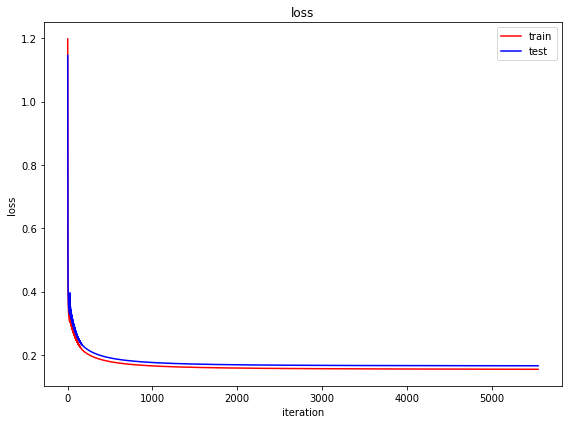

In [1021]:
plot_loss_curve(loss_iteration_train, loss_iteration_test)

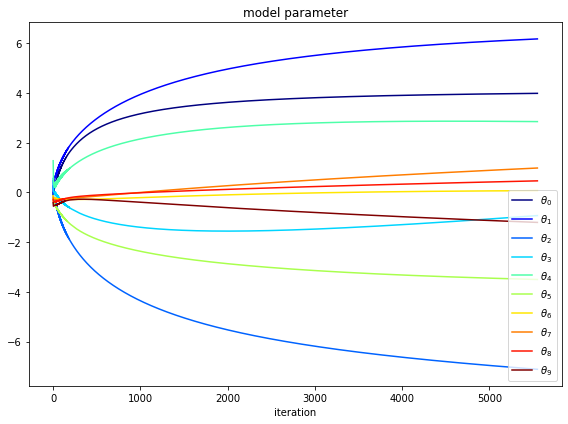

In [1022]:
plot_model_parameter(theta_iteration)

In [1023]:
def plot_classifier(data, theta,label):

    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
   
    t = 0.01
    x_min, x_max = data[:,0].min(), data[:,0].max()
    y_min, y_max = data[:,1].min(), data[:,1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, t), np.arange(y_min, y_max, t))
    
    X = xx.ravel()
    Y = yy.ravel()
    
    feature = feature_function(X, Y)
    h = regression_function(theta, feature)
    Z = h.reshape(xx.shape)
    
    cntr = plt.contourf(xx, yy,Z,cmap = plt.get_cmap('RdBu_r'),levels = 90, vmin = -25, vmax = 25)
    plt.colorbar(cntr) 

    plt.scatter(data[:, 0][label == 1],data[:, 1][label == 1], c="r", marker=".",label="class 1 ")
    plt.scatter(data[:, 0][label == 0],data[:, 1][label == 0], c="b", marker=".",label="class 0 ")
    
    plt.contour(xx,yy,Z,levels=[0],colors ="black")
    
    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
plot_classifier(data_train, theta_optimal ,label_train)

In [ ]:
plot_classifier(data_test, theta_optimal,label_test)

***

# results

***

1. plot the input data (training on the left sub-figure and testing on the right sub-figure) in blue for class 0 and in red for class 1 from the file [assignment_10_data_train.csv] and [assignment_10_data_test.csv], respectively,

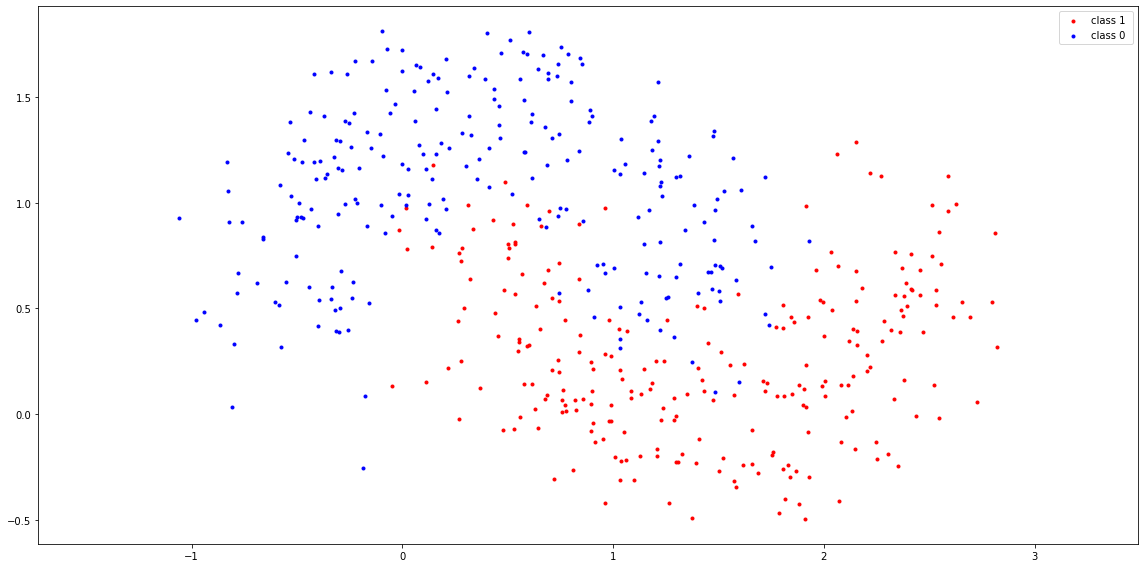

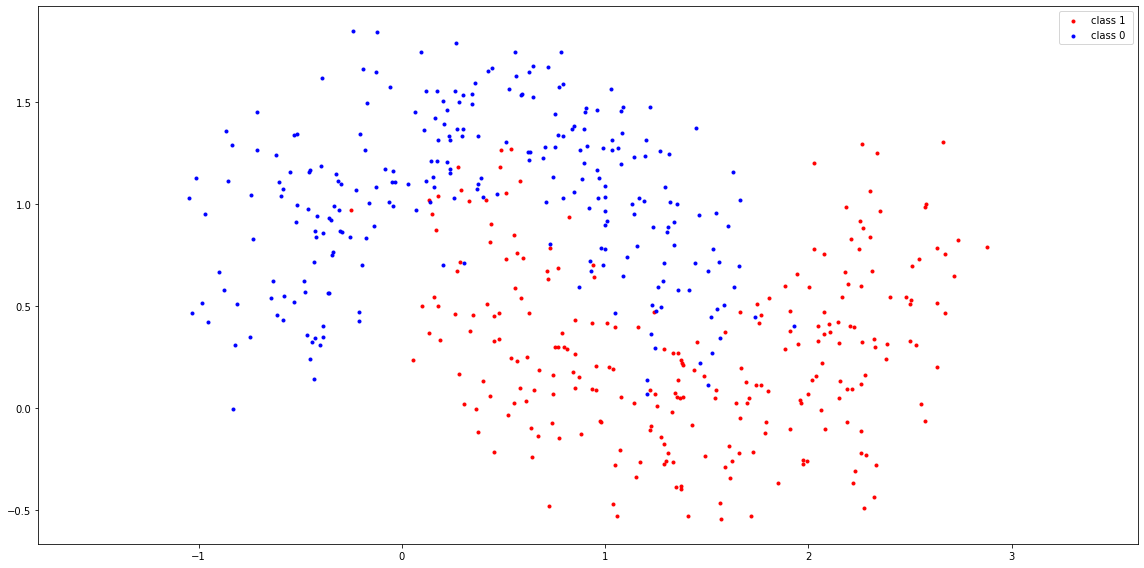

In [989]:
plot_data(data_train, data_test)

***

2. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors

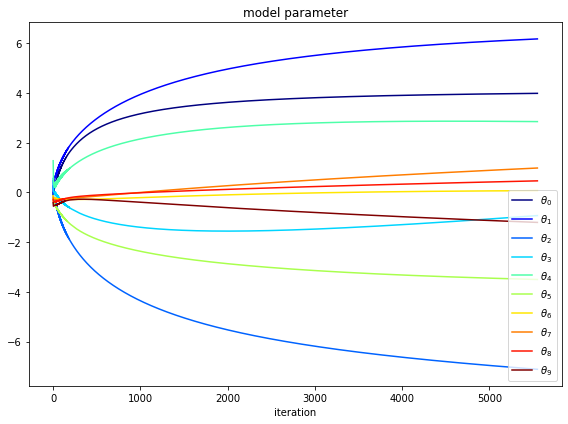

In [990]:
plot_model_parameter(theta_iteration)

***

3. plot the training loss in red curve and the testing loss in blue curve over the gradient descent iterations

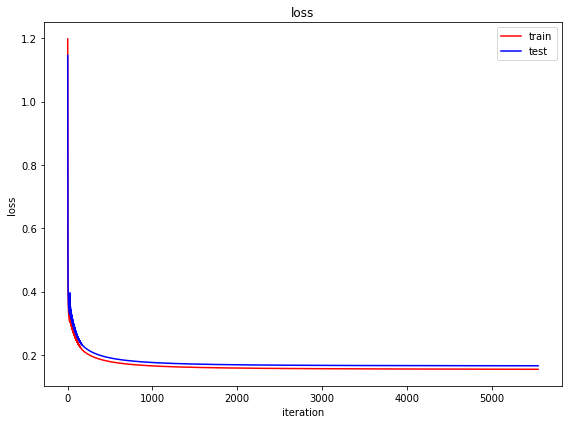

In [991]:
plot_loss_curve(loss_iteration_train, loss_iteration_test)

***

4. plot the training accuracy in red curve and the testing accuracy in blue curve over the gradient descent iterations

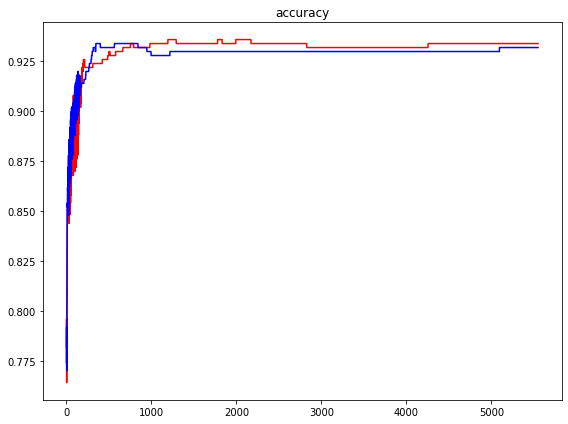

In [992]:
plot_accuracy_curve(accuracy_iteration_train, accuracy_iteration_test)

***

5. plot the classifier using the prediction values in the color coding scheme ranges from blue (class 0) to red (class 1) with the training data

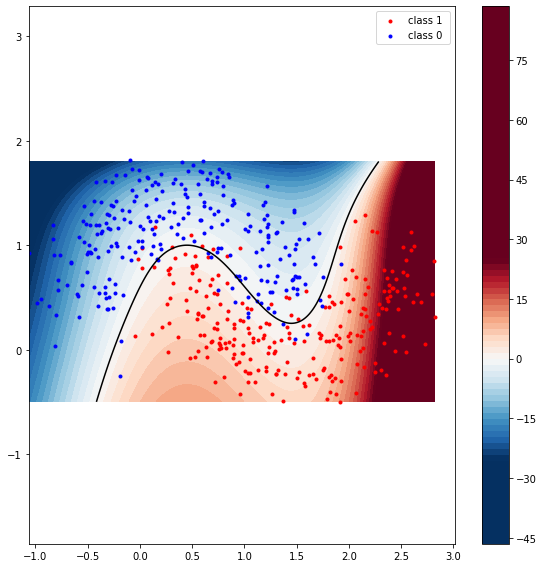

In [993]:
plot_classifier(data_train, theta_optimal,label_train)

***

6. plot the classifier using the prediction values in the color coding scheme ranges from blue (class 0) to red (class 1) with the testing data

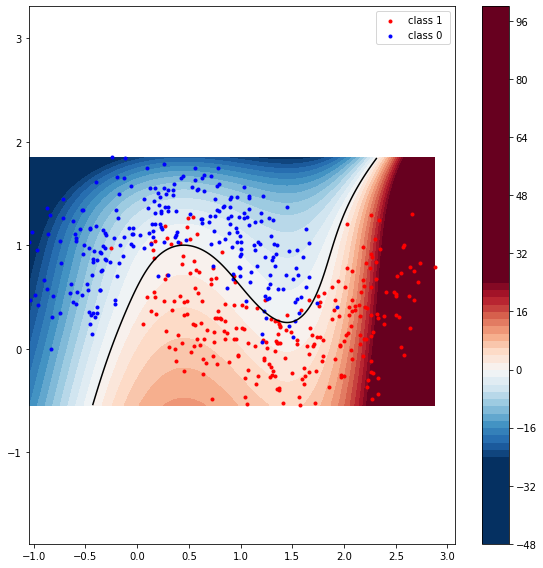

In [994]:
plot_classifier(data_test, theta_optimal,label_test)

***

7. print out the final training accuracy and the final testing accuracy in number with 5 decimal places (e.g. 0.98765)

In [1000]:
print('accuract(train): {:.5f}'.format(accuracy_train))
print('accuracy(test) : {:.5f}'.format(accuracy_test))

accuract(train): 0.93400
accuracy(test) : 0.93200
